In [1]:
import pandas as pd 
df = pd.read_csv('flight_weather.csv', index_col = False)
df

,Unnamed: 0,flight_date,flight_status,departure_airport,departure_timezone,departure_iata,departure_icao,departure_gate,departure_delay,departure_scheduled,...,ghi_arrival,max_temp_arrival,t_dni_arrival,max_uv_arrival,t_dhi_arrival,datetime_arrival,t_solar_rad_arrival,min_temp_arrival,max_wind_dir_arrival,snow_depth_arrival
0,0,2021-12-06,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,2021-12-06 21:25:00+00:00,...,55.6,2.0,4093.2,0.5,459.1,2021-12-06,276.6,-1.0,166.0,NaN
1,1,2021-12-06,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,2021-12-06 21:25:00+00:00,...,55.6,2.0,4093.2,0.5,459.1,2021-12-06,276.6,-1.0,166.0,NaN
2,2,2021-12-06,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,2021-12-06 21:25:00+00:00,...,55.6,2.0,4093.2,0.5,459.1,2021-12-06,276.6,-1.0,166.0,NaN
3,3,2021-12-06,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,2021-12-06 21:25:00+00:00,...,55.6,2.0,4093.2,0.5,459.1,2021-12-06,276.6,-1.0,166.0,NaN
4,4,2021-12-06,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,2021-12-06 21:25:00+00:00,...,55.6,2.0,4093.2,0.5,459.1,2021-12-06,276.6,-1.0,166.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36402,36402,2022-02-28,landed,Zurich,Europe/Zurich,ZRH,LSZH,A83,15.0,2022-02-28 17:30:00+00:00,...,149.3,6.0,6940.7,3.2,804.2,2022-02-28,3584.1,-5.0,55.0,NaN
36403,36403,2022-02-28,landed,Zurich,Europe/Zurich,ZRH,LSZH,1,17.0,2022-02-28 17:30:00+00:00,...,87.8,3.0,5429.9,1.9,630.8,2022-02-28,2107.1,-2.0,224.0,NaN
36404,36404,2022-02-28,landed,Zurich,Europe/Zurich,ZRH,LSZH,1,17.0,2022-02-28 17:30:00+00:00,...,87.8,3.0,5429.9,1.9,630.8,2022-02-28,2107.1,-2.0,224.0,NaN
36405,36405,2022-02-28,landed,Ramon Villeda Morales International,America/Tegucigalpa,SAP,MHLM,NaN,36.0,2022-02-28 12:00:00+00:00,...,286.6,24.0,9193.5,9.7,1055.0,2022-02-28,6870.7,5.0,117.0,NaN


In [2]:
# delete the null rows for flight_date
# set delay of departure as Y, used other features to predict
df = df.dropna(subset=['departure_delay'], axis = 0)
# we first select the numerical features to process the featuresd
df_to_be_processed = df[df.describe().columns]
# summarize the null value 
df_to_be_processed.isna().sum().sort_values().tail(10)

# df_to_be_processed.fl
# df_to_be_processed.drop(columns=[''])
# Fill na in column snow_depth_arrival and snow_depth_arrival, snow_depth_departure

df_to_be_processed[['snow_depth_arrival', 'snow_depth_departure']] = df_to_be_processed[['snow_depth_arrival', 'snow_depth_departure']].fillna(0)
df_to_be_processed['flight_number'] = df_to_be_processed['flight_number'].fillna(method = 'pad')
# df_to_be_processed.flight_number
df_res = df_to_be_processed.drop(columns = df_to_be_processed.columns[0], axis =1)

df_res


/opt/homebrew/anaconda3/envs/cmpt733/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/homebrew/anaconda3/envs/cmpt733/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,departure_delay,flight_number,rh_departure,max_wind_spd_ts_departure,t_ghi_departure,max_wind_spd_departure,solar_rad_departure,wind_gust_spd_departure,max_temp_ts_departure,min_temp_ts_departure,...,max_dhi_arrival,ghi_arrival,max_temp_arrival,t_dni_arrival,max_uv_arrival,t_dhi_arrival,t_solar_rad_arrival,min_temp_arrival,max_wind_dir_arrival,snow_depth_arrival
0,10.0,3240.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
1,10.0,3240.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
2,10.0,3375.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
3,10.0,3375.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
4,10.0,3789.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36402,15.0,1110.0,64.3,1646085600,3697.0,5.1,154.0,5.1,1646056800,1646028000,...,99.4,149.3,6.0,6940.7,3.2,804.2,3584.1,-5.0,55.0,0.0
36403,17.0,3510.0,64.3,1646085600,3697.0,5.1,154.0,5.1,1646056800,1646028000,...,83.2,87.8,3.0,5429.9,1.9,630.8,2107.1,-2.0,224.0,0.0
36404,17.0,1254.0,64.3,1646085600,3697.0,5.1,154.0,5.1,1646056800,1646028000,...,83.2,87.8,3.0,5429.9,1.9,630.8,2107.1,-2.0,224.0,0.0
36405,36.0,8170.0,88.7,1646078400,7073.3,6.2,57.6,6.2,1646067600,1646042400,...,118.4,286.6,24.0,9193.5,9.7,1055.0,6870.7,5.0,117.0,0.0


In [3]:
Y = df_res['departure_delay']
X = df_res.drop(columns = 'departure_delay', axis = 1)
X

,flight_number,rh_departure,max_wind_spd_ts_departure,t_ghi_departure,max_wind_spd_departure,solar_rad_departure,wind_gust_spd_departure,max_temp_ts_departure,min_temp_ts_departure,clouds_departure,...,max_dhi_arrival,ghi_arrival,max_temp_arrival,t_dni_arrival,max_uv_arrival,t_dhi_arrival,t_solar_rad_arrival,min_temp_arrival,max_wind_dir_arrival,snow_depth_arrival
0,3240.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,93,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
1,3240.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,93,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
2,3375.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,93,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
3,3375.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,93,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
4,3789.0,94.2,1638824400,1024.3,8.2,5.4,8.2,1638759600,1638770400,93,...,74.1,55.6,2.0,4093.2,0.5,459.1,276.6,-1.0,166.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36402,1110.0,64.3,1646085600,3697.0,5.1,154.0,5.1,1646056800,1646028000,0,...,99.4,149.3,6.0,6940.7,3.2,804.2,3584.1,-5.0,55.0,0.0
36403,3510.0,64.3,1646085600,3697.0,5.1,154.0,5.1,1646056800,1646028000,0,...,83.2,87.8,3.0,5429.9,1.9,630.8,2107.1,-2.0,224.0,0.0
36404,1254.0,64.3,1646085600,3697.0,5.1,154.0,5.1,1646056800,1646028000,0,...,83.2,87.8,3.0,5429.9,1.9,630.8,2107.1,-2.0,224.0,0.0
36405,8170.0,88.7,1646078400,7073.3,6.2,57.6,6.2,1646067600,1646042400,92,...,118.4,286.6,24.0,9193.5,9.7,1055.0,6870.7,5.0,117.0,0.0


In [4]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
columns = X.columns
selector = SelectKBest(f_classif, k=8)
features = selector.fit_transform(X, Y)
cols=selector.get_support(indices=True)

lr = LinearRegression()
br = BayesianRidge()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_jobs=-1)
svr = SVR(kernel='rbf', gamma='auto')
regressor_list = [lr, br, gbr, rfr, svr, dtr]


for i in regressor_list:
    scores = cross_val_score(estimator=i,X=features, y=Y, cv=tscv,
                             scoring="neg_root_mean_squared_error", verbose=True)
    print("%s model's neg_mean_squared_error is %.2f " % (i, scores.mean()))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression() model's neg_mean_squared_error is -53.08 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BayesianRidge() model's neg_mean_squared_error is -53.08 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GradientBoostingRegressor() model's neg_mean_squared_error is -66.35 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestRegressor(n_estimators=1000, n_jobs=-1) model's neg_mean_squared_error is -73.95 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR(gamma='auto') model's neg_mean_squared_error is -53.18 
DecisionTreeRegressor() model's neg_mean_squared_error is -93.17 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [5]:
for i in cols:
    print(columns[i])



max_wind_spd_ts_departure
max_wind_spd_departure
wind_gust_spd_departure
precip_gpm_departure
wind_spd_departure
precip_departure
snow_depth_departure
snow_arrival


In [8]:
df_features = df_res.iloc[:,cols]
df_target = Y
# df_target[train_index[0]:train_index[-1]]
df_target

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
36402    15.0
36403    17.0
36404    17.0
36405    36.0
36406    36.0
Name: departure_delay, Length: 31058, dtype: float64

In [23]:


# Use time series to perfrom train / test dataset
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from  random import randint

tscv = TimeSeriesSplit(n_splits = 5)
score_list = []

rfr = RandomForestRegressor( random_state=50)



# for train_index, test_index in tscv.split(df):
    
#     train_X = df_features.iloc[train_index[0] : train_index[-1], :]
#     train_y = df_target[train_index[0]:train_index[-1]]
#     test_X = df_features.iloc[test_index[0] : test_index[-1], :]
#     test_y = df_target[test_index[0] : test_index[-1]]

#     rfr.fit(train_X, train_y)
#     scores = rfr.score(test_X, test_y)
#     print("clf score: ", scores)
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, shuffle = False)
param_dist = {"max_depth": [3, 10, None],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 20, 30, 40, None],
              'min_samples_leaf': [1, 2, 4],
              "criterion": ["squared_error", "absolute_error"],
              "n_estimators": [10, 100, 400],
              "bootstrap": [True, False]}
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_dist, n_iter = 50, cv = tscv, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
# score = rfr.score(X_test, y_test)
# score
print(rf_random.best_params_)
best_random = rf_random.best_estimator_
best_random

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=4, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=4, n_estimators=10; total time=   0.4s
[CV] END bootstrap=True, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=4, n_estimators=10; total time=   0.9s
[CV] END bootstrap=True, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=4, n_estimators=10; total time=   1.3s
[CV] END bootstrap=True, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=4, n_estimators=10; total time=   0.5s
[CV] END bootstrap=False, criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   3.1s
[CV] END bootstrap=False, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=4

/opt/homebrew/anaconda3/envs/cmpt733/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV] END bootstrap=True, criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   6.6s
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=  14.8s
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=  22.2s
[CV] END bootstrap=False, criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time= 1.3min
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=  30.3s
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=  43.3s
[CV] END bootstrap=False, criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=400; total time= 2.4min
[CV] END bootstra

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', min_samples_leaf=4, random_state=50)

In [24]:
import joblib

#save your model or results
joblib.dump(rf_random, 'model_file_name.pkl')

#load your model for further usage


['model_file_name.pkl']

In [25]:
test = joblib.load("model_file_name.pkl")
test.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', min_samples_leaf=4, random_state=50)

In [28]:
test.cv_results_

{'mean_fit_time': array([3.03217752e+01, 6.44509697e-01, 3.42598774e+01, 1.61681881e+03,
        2.32010554e+01, 4.61270649e+03, 1.17878914e-01, 6.70140648e-01,
        1.12985563e+01, 1.77999195e+02, 2.11563716e+00, 4.33207121e+01,
        2.72384834e-01, 4.39599793e+01, 7.27710005e+02, 6.00320840e+01,
        3.31133053e+01, 4.38490216e+01, 1.81120356e+02, 1.49569529e+03,
        6.06765694e+02, 7.47210217e-01, 1.21087809e+02, 1.56909084e-01,
        3.46477968e+01, 7.30705876e+00, 4.93185828e+01, 1.13993393e+03,
        4.58684788e+00, 5.43894844e+00, 2.11070919e-01, 1.01707697e-01,
        4.08504325e+03, 4.85615405e+02, 1.83631511e+03, 5.22250795e-01,
        4.71056485e+00, 3.53128552e+01, 4.28172229e+02, 4.28739572e+01,
        4.50509644e-01, 1.50867414e-01, 1.13909970e+03, 4.71945554e+01,
        1.40262000e+02, 1.87044301e+00, 5.24370160e+00, 1.21304332e+01,
        1.60624361e-01, 1.07047529e+02]),
 'std_fit_time': array([1.70505499e+01, 3.99286347e-01, 2.78051802e+01, 1.335

[4 5 1 3 2 0 6 7]
[0.13959573 0.06231851 0.12394232 0.06785695 0.02984844 0.05705653
 0.17283309 0.34654843]


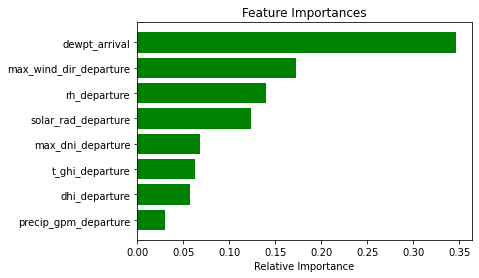

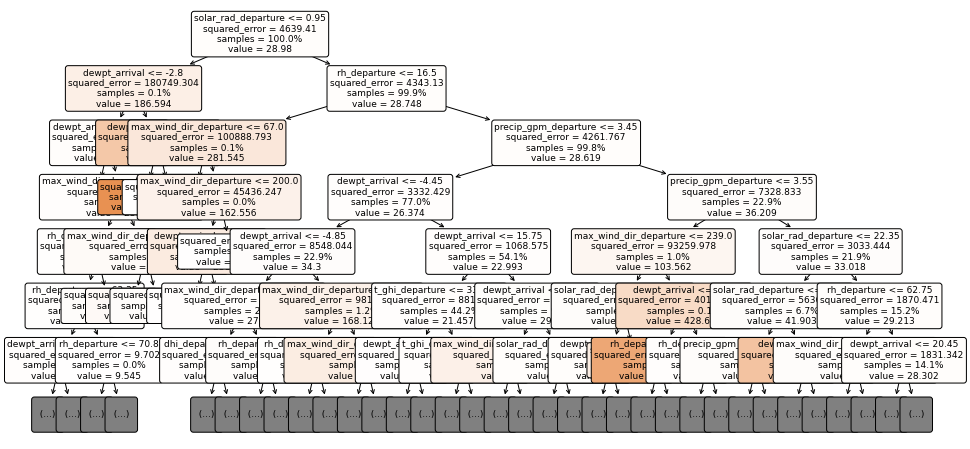

In [16]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import tree

importances = rfr.feature_importances_
indices = np.argsort(importances)
print(indices)
features = df_features.columns

print(importances)
plt.title('Feature Importances')
j = 8# top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()
estimator = rfr.estimators_[5]
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(estimator, feature_names = features, class_names = ['Benign', 'Malignant'], max_depth=6, fontsize=9, proportion=True, filled=True, rounded=True)